In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew 

plt.style.use('ggplot')

In [24]:
df = pd.read_csv("training.csv", sep=";")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70235,2015-09-13,Cairns,19.2,29.1,0.0,NaN,NaN,ESE,52.0,SSE,...,56.0,1021.2,1017.4,NaN,1.0,24.8,27.2,No,8.2,Yes
70236,2015-09-14,Cairns,20.0,28.2,8.2,NaN,NaN,SE,50.0,SSE,...,62.0,1019.8,1016.4,8.0,7.0,23.6,25.7,Yes,0.0,No
70237,2015-09-15,Cairns,19.8,29.1,0.0,NaN,NaN,ESE,41.0,SSE,...,54.0,1018.7,1015.2,8.0,8.0,25.3,27.4,No,3.4,Yes
70238,2015-09-16,Cairns,18.8,28.3,3.4,NaN,NaN,SE,33.0,SSE,...,44.0,1018.9,1014.7,NaN,NaN,24.1,27.6,Yes,0.0,No


In [29]:
print(df.shape)
print(df["Date"].nunique())
print(df["Date"].value_counts())

(70240, 24)
3120
2013-07-07    30
2013-03-04    30
2014-01-14    30
2013-12-16    30
2013-06-10    30
              ..
2016-03-19     1
2007-12-14     1
2008-01-01     1
2016-03-05     1
2016-02-17     1
Name: Date, Length: 3120, dtype: int64


In [19]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [56]:
label = "RainTomorrow"
real_vars = ["MinTemp",
             "MaxTemp",
             "Rainfall",
             "Evaporation",
             "Sunshine",
             "WindGustSpeed",
             "WindSpeed9am",
             "WindSpeed3pm",
             "Humidity9am",
             "Humidity3pm",
             "Pressure9am",
             "Pressure3pm",
             "Cloud9am",
             "Cloud3pm",
             "Temp9am",
             "Temp3pm",
             "RISK_MM"]

cat_vars = ["Location",
                 "WindGustDir",
                 "WindDir9am",
                 "WindDir3pm",
                 "RainToday",
                 "RainTomorrow"]

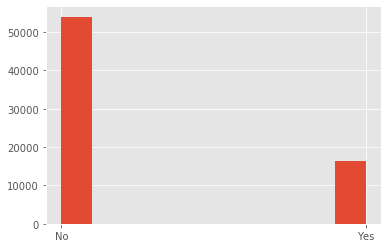

In [31]:
df[label].hist()

In [32]:
df[label].describe()

No     0.768408
Yes    0.231592
Name: RainTomorrow, dtype: float64

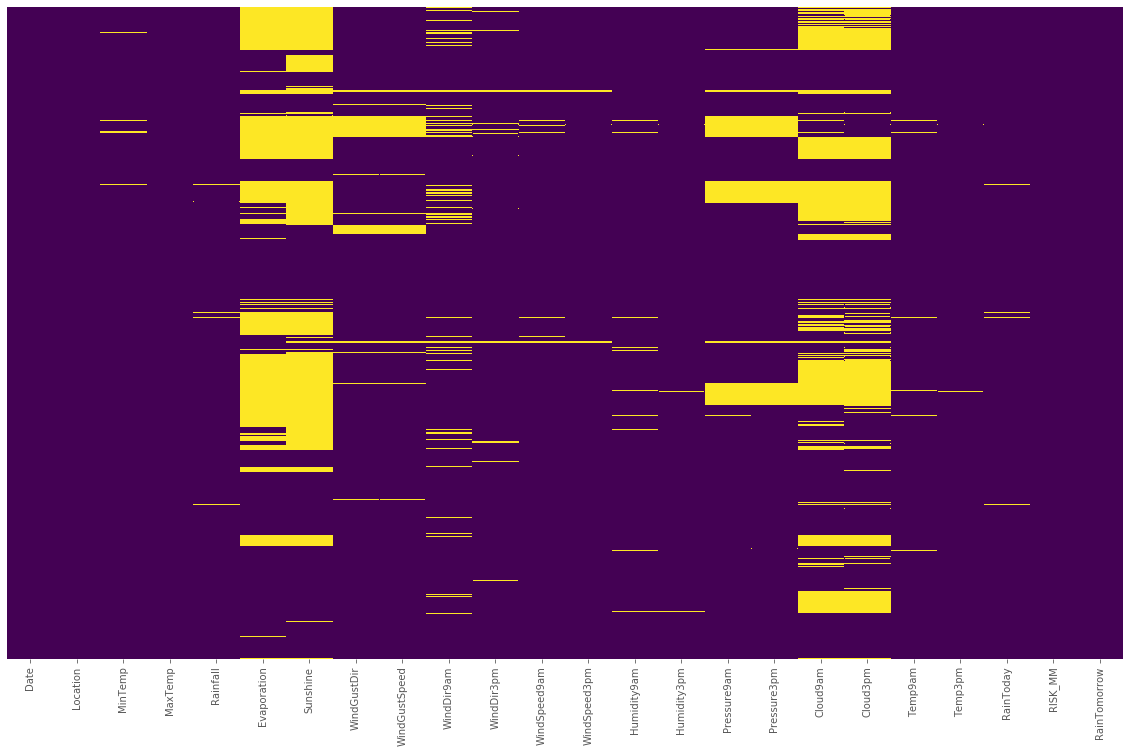

In [58]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

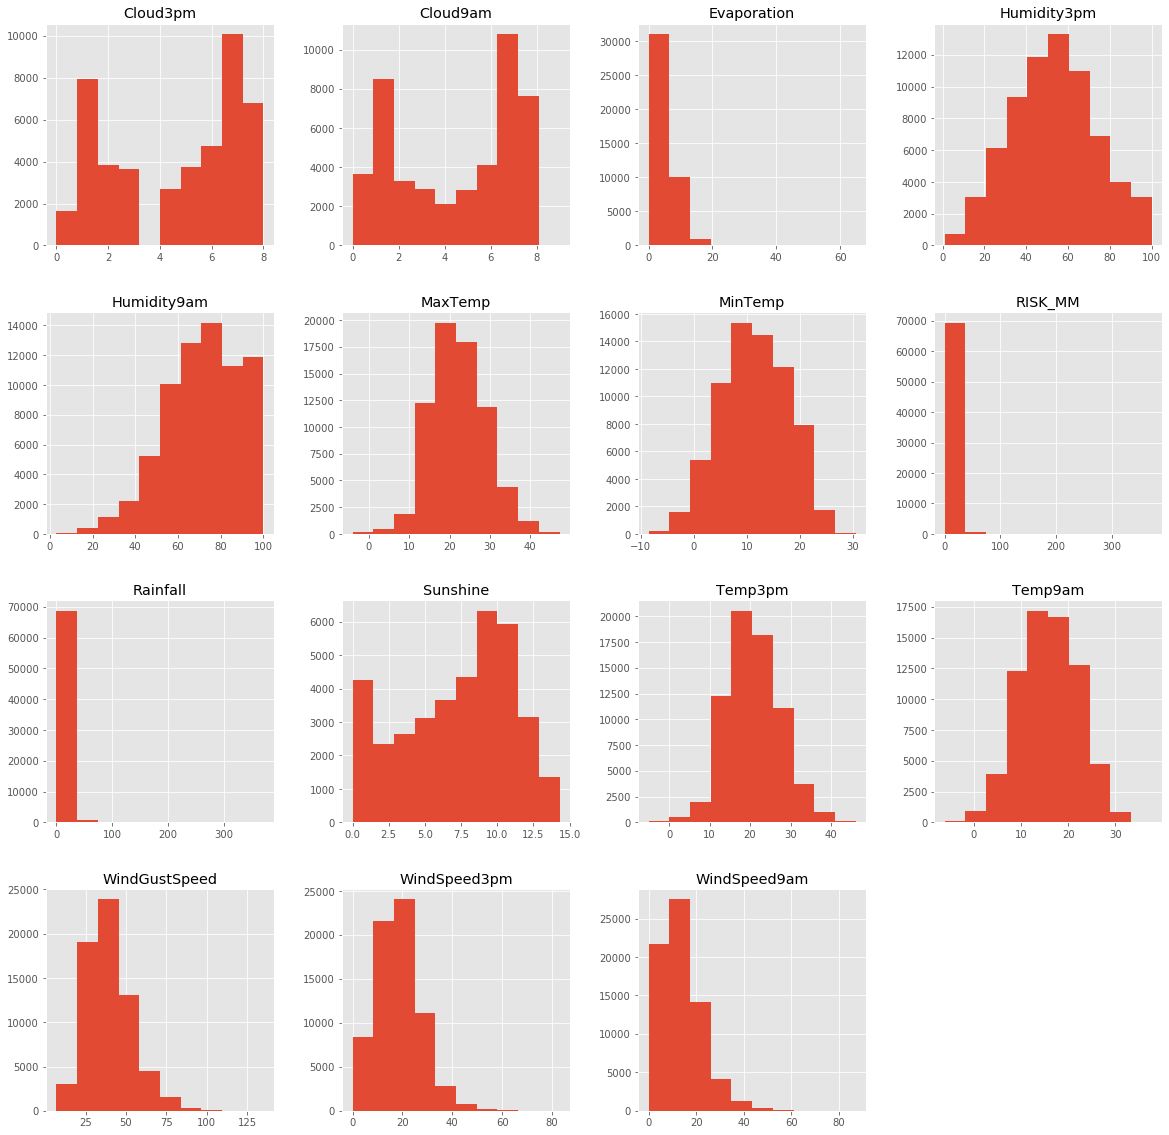

In [57]:
df[real_vars].hist(figsize=(20, 20));

In [69]:
#df[cat_vars].value_counts()#.plot.bar(figsize=(20, 20));

In [41]:
print(df[df[label] == "Yes"]["RISK_MM"])
_ = df[df[label] == "Yes"]["RISK_MM"].plot

8         1.4
10        2.2
11       15.6
12        3.6
15       16.8
         ... 
70191     5.2
70213     2.2
70214     8.6
70235     8.2
70237     3.4
Name: RISK_MM, Length: 16267, dtype: float64


In [37]:
print(df[df[label] == "No"]["RISK_MM"])

0        0.0
1        0.0
2        0.0
3        1.0
4        0.2
        ... 
70233    0.6
70234    0.0
70236    0.0
70238    0.0
70239    0.0
Name: RISK_MM, Length: 53973, dtype: float64


# Препроцесинг

In [86]:
data = df.copy()
data[real_vars].fillna(0, inplace = True)

to_drop = ["Date", "WindGustDir", "WindDir9am", "WindDir3pm"]
data = data.drop(columns = to_drop)
data.info()
data["Pressure9am"] = pd.to_numeric(data["Pressure9am"], errors='coerce')
data["Pressure3pm"] = pd.to_numeric(data["Pressure3pm"], errors='coerce')
data = pd.get_dummies(data, dummy_na=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70240 entries, 0 to 70239
Data columns (total 20 columns):
Location         70240 non-null object
MinTemp          69882 non-null float64
MaxTemp          70080 non-null float64
Rainfall         69428 non-null float64
Evaporation      42191 non-null float64
Sunshine         37113 non-null float64
WindGustSpeed    65579 non-null float64
WindSpeed9am     69212 non-null float64
WindSpeed3pm     69152 non-null float64
Humidity9am      69185 non-null float64
Humidity3pm      69305 non-null float64
Pressure9am      62341 non-null object
Pressure3pm      62389 non-null object
Cloud9am         45778 non-null float64
Cloud3pm         45115 non-null float64
Temp9am          69502 non-null float64
Temp3pm          69581 non-null float64
RainToday        69428 non-null object
RISK_MM          70240 non-null float64
RainTomorrow     70240 non-null object
dtypes: float64(15), object(5)
memory usage: 10.7+ MB
<class 'pandas.core.frame.DataFrame'>
Rang

In [87]:
data.to_csv("training_prepared.csv")